# The datasets

- https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2018&name_desc=false&start=2018&view=map This dataset contains worldwide yearly GDP data
- https://climateknowledgeportal.worldbank.org/download-data These datasets contain worldwide data on monthly rainfall(mm), where one captures the years 1961-1990 and the second one covers the years 1991 to 2016

In [404]:
# Import libraries, that are needed to fulfill analysis of the data
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [405]:
# Import the merged dataset with weather and agricultural data, which was created in the first notebook
weath_agr = pd.read_csv('weather_agricult.csv')

In [406]:
# Import GDP dataset
gdp = pd.read_csv('GDP_61_15_2.csv', delimiter=';', names=range(65))

In [407]:
# Import rainfall datasets
rain1 = pd.read_csv('rainfall_61_90.csv', names=range(6))
rain2 = pd.read_csv('rainfall_91_16.csv', names=range(6))

## Get overview of the merged dataset

In [408]:
# Look at the merged dataframe
weath_agr.head()

,Temperature(Celsius),Year,Statistics,Country,Agricultural land in %
0,1.39097,1961,Jan Average,Afghanistan,57.745918
1,0.90369,1961,Feb Average,Afghanistan,57.745918
2,8.00043,1961,Mar Average,Afghanistan,57.745918
3,12.35880,1961,Apr Average,Afghanistan,57.745918
4,19.26180,1961,May Average,Afghanistan,57.745918


In [409]:
# Get info of merged dataframe
weath_agr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86460 entries, 0 to 86459
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature(Celsius)    86460 non-null  float64
 1   Year                    86460 non-null  int64  
 2   Statistics              86460 non-null  object 
 3   Country                 86460 non-null  object 
 4   Agricultural land in %  79392 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 3.3+ MB


In [410]:
# Count null values in column Agricultural land in %
weath_agr['Agricultural land in %'].isnull().sum()

7068

In [411]:
# Show rows with null values for agricultural land
print(weath_agr[weath_agr['Agricultural land in %'].isnull()])

       Temperature(Celsius)  Year    Statistics       Country  \
2520               -6.50600  1961   Jan Average       Armenia   
2521               -4.90680  1961   Feb Average       Armenia   
2522               -0.75270  1961   Mar Average       Armenia   
2523                7.59543  1961   Apr Average       Armenia   
2524               14.20820  1961   May Average       Armenia   
...                     ...   ...           ...           ...   
84847              33.74640  2006   Aug Average  Saudi Arabia   
84848              31.13880  2006   Sep Average  Saudi Arabia   
84849              27.27880  2006   Oct Average  Saudi Arabia   
84850              20.50390  2006   Nov Average  Saudi Arabia   
84851              14.86010  2006   Dec Average  Saudi Arabia   

       Agricultural land in %  
2520                      NaN  
2521                      NaN  
2522                      NaN  
2523                      NaN  
2524                      NaN  
...                       .

In [412]:
# Create new dataset to check null values
cntr_nan = weath_agr[weath_agr['Agricultural land in %'].isnull()]

In [413]:
# Look at the countries with missing values for agricultural land
cntr_nan_unique = cntr_nan['Country'].unique().tolist()
cntr_nan_unique

['Armenia',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Croatia',
 'Czech Republic',
 'Eritrea',
 'Estonia',
 'Georgia',
 'Kazakhstan',
 'Kyrgyzstan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Marshall Islands',
 'Palau',
 'Saudi Arabia']

In [414]:
# Check for how many countries null values exist
len(cntr_nan_unique)

18

In [415]:
# Check how many null values exist for each country to plan further action
check_null = weath_agr[weath_agr.isna().any(axis=1)]
country_nan = check_null['Agricultural land in %'].isnull().groupby([check_null['Country']]).sum().astype(int).reset_index(name='count')
country_nan

,Country,count
0,Armenia,372
1,Azerbaijan,372
2,Belarus,372
3,Belgium,468
4,Bosnia and Herzegovina,372
5,Croatia,372
6,Czech Republic,384
7,Eritrea,384
8,Estonia,372
9,Georgia,372


The analysis shows that there are too many null values for the countries listed, so that replacing these missing values would distort the results of the analysis too much.
The countries concerned should therefore no longer be taken into account in the further analysis.

In [416]:
# Identification of the lines that must be deleted in order to be excluded from further analysis
index_drop = weath_agr[weath_agr['Agricultural land in %'].isnull()].index

In [417]:
# Check whether the number of rows to be deleted matches the number of identified null values
index_drop

Int64Index([ 2520,  2521,  2522,  2523,  2524,  2525,  2526,  2527,  2528,
             2529,
            ...
            84842, 84843, 84844, 84845, 84846, 84847, 84848, 84849, 84850,
            84851],
           dtype='int64', length=7068)

In [418]:
# Deleting the data affected by null values
weath_agr.drop(index_drop , inplace=True)

In [419]:
# Check
weath_agr.head()

,Temperature(Celsius),Year,Statistics,Country,Agricultural land in %
0,1.39097,1961,Jan Average,Afghanistan,57.745918
1,0.90369,1961,Feb Average,Afghanistan,57.745918
2,8.00043,1961,Mar Average,Afghanistan,57.745918
3,12.35880,1961,Apr Average,Afghanistan,57.745918
4,19.26180,1961,May Average,Afghanistan,57.745918


In [420]:
# Create new dataset to check null values again
cntr_nan1 = weath_agr[weath_agr['Agricultural land in %'].isnull()]

In [421]:
# Check if deletion of countries affected by null values was successful
cntr_nan_unique1 = cntr_nan1['Country'].unique().tolist()
cntr_nan_unique1

[]

# GDP data

## Get overview of the dataset and prepare it for merging: GDP data

In [422]:
# Look at 5 first rows
gdp.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Country Name,Country Code,Indicator Name,Indicator Code,1.960000e+03,1.961000e+03,1.962000e+03,1.963000e+03,1.964000e+03,1.965000e+03,...,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2019.0,NaN
1,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN,NaN,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780428e+10,2.000162e+10,2.056105e+10,2.048487e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.936297e+10,NaN,NaN
3,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.057510e+11,NaN,NaN
4,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.186135e+10,1.302506e+10,1.510250e+10,NaN,NaN


In [423]:
# Get a header
gdp.columns = gdp.iloc[0]
gdp.reset_index(drop=True)

,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,NaN
0,Country Name,Country Code,Indicator Name,Indicator Code,1.960000e+03,1.961000e+03,1.962000e+03,1.963000e+03,1.964000e+03,1.965000e+03,...,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2019.0,NaN
1,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN,NaN,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780428e+10,2.000162e+10,2.056105e+10,2.048487e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.936297e+10,NaN,NaN
3,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.057510e+11,NaN,NaN
4,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.186135e+10,1.302506e+10,1.510250e+10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.692431e+09,6.499760e+09,7.071982e+09,7.386883e+09,6.440068e+09,6.714727e+09,7.227700e+09,7.938991e+09,NaN,NaN
261,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.272642e+10,3.540134e+10,4.041523e+10,4.322859e+10,4.262833e+10,3.096824e+10,2.681870e+10,2.691440e+10,NaN,NaN
262,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575397e+09,7.972997e+09,8.497997e+09,9.423396e+09,1.037400e+10,1.133440e+10,...,4.164189e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.176205e+11,2.963573e+11,3.495541e+11,3.682889e+11,NaN,NaN
263,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.124335e+10,2.095475e+10,2.586814e+10,2.672007e+10,NaN,NaN


In [424]:
# Delete first row (copy of header)
gdp.drop([0], inplace=True)

In [425]:
# Drop columns that are not needed for further analysis
gdp.drop(['Country Code', 'Indicator Code', 'Indicator Name'], axis=1, inplace=True)

In [426]:
# Rename column country for consistency
gdp.rename(columns={"Country Name": "Country"}, inplace=True)
gdp.head()

,Country,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,NaN
1,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN,NaN,NaN
2,Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,...,1.780428e+10,2.000162e+10,2.056105e+10,2.048487e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.936297e+10,NaN,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.057510e+11,NaN,NaN
4,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.186135e+10,1.302506e+10,1.510250e+10,NaN,NaN
5,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.013387e+09,3.236544e+09,NaN,NaN


In [427]:
# Get info about dataset
gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 1 to 264
Data columns (total 62 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  264 non-null    object 
 1   1960.0   132 non-null    float64
 2   1961.0   132 non-null    float64
 3   1962.0   134 non-null    float64
 4   1963.0   134 non-null    float64
 5   1964.0   134 non-null    float64
 6   1965.0   144 non-null    float64
 7   1966.0   148 non-null    float64
 8   1967.0   151 non-null    float64
 9   1968.0   155 non-null    float64
 10  1969.0   155 non-null    float64
 11  1970.0   165 non-null    float64
 12  1971.0   166 non-null    float64
 13  1972.0   166 non-null    float64
 14  1973.0   166 non-null    float64
 15  1974.0   167 non-null    float64
 16  1975.0   171 non-null    float64
 17  1976.0   172 non-null    float64
 18  1977.0   176 non-null    float64
 19  1978.0   175 non-null    float64
 20  1979.0   176 non-null    float64
 21  1980.0   186 non

In [428]:
# Categorize 'Country'
gdp['Country'] = gdp['Country'].astype('category')

In [429]:
# Change the shape of dataframe
gdp_ro = gdp.melt(id_vars=["Country"], 
        var_name="Year",
        value_name="GDP")
# Reorder the data, first by country, then by year
gdp_ro.sort_values(by=['Country', 'Year'], inplace=True)

In [430]:
# Check result
gdp_ro

,Country,Year,GDP
1,Afghanistan,1960,5.377778e+08
265,Afghanistan,1961,5.488889e+08
529,Afghanistan,1962,5.466667e+08
793,Afghanistan,1963,7.511112e+08
1057,Afghanistan,1964,8.000000e+08
...,...,...,...
15047,Zimbabwe,2016,2.054868e+10
15311,Zimbabwe,2017,2.281301e+10
15575,Zimbabwe,2018,3.100052e+10
15839,Zimbabwe,2019,NaN


In [431]:
# Again reset index
gdp_ro.reset_index(drop=True)

,Country,Year,GDP
0,Afghanistan,1960,5.377778e+08
1,Afghanistan,1961,5.488889e+08
2,Afghanistan,1962,5.466667e+08
3,Afghanistan,1963,7.511112e+08
4,Afghanistan,1964,8.000000e+08
...,...,...,...
16099,Zimbabwe,2016,2.054868e+10
16100,Zimbabwe,2017,2.281301e+10
16101,Zimbabwe,2018,3.100052e+10
16102,Zimbabwe,2019,NaN


In [432]:
# Count countries
cntr_count = gdp_ro['Country'].unique().tolist()
len(cntr_count)

264

In [433]:
gdp_ro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16104 entries, 1 to 16103
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Country  16104 non-null  category
 1   Year     15840 non-null  object  
 2   GDP      12131 non-null  float64 
dtypes: category(1), float64(1), object(1)
memory usage: 421.0+ KB


### Handle null values

In [434]:
# Count null values in column GDP
gdp_ro['GDP'].isnull().sum()

3973

In [435]:
# Show rows with null values for GDP
print(gdp_ro[gdp_ro['GDP'].isnull()])

           Country  Year  GDP
5809   Afghanistan  1982  NaN
6073   Afghanistan  1983  NaN
6337   Afghanistan  1984  NaN
6601   Afghanistan  1985  NaN
6865   Afghanistan  1986  NaN
...            ...   ...  ...
16100  Yemen, Rep.   NaN  NaN
15838       Zambia  2019  NaN
16102       Zambia   NaN  NaN
15839     Zimbabwe  2019  NaN
16103     Zimbabwe   NaN  NaN

[3973 rows x 3 columns]


In [436]:
# Create new dataset to check null values
cntr_nan_gdp = gdp_ro[gdp_ro['GDP'].isnull()]

In [437]:
# Look at the countries with missing values for GDP
cntr_nan_unique_gdp = cntr_nan_gdp['Country'].unique().tolist()
cntr_nan_unique_gdp

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD coun

In [438]:
# Check for how many countries null values exist
len(cntr_nan_unique_gdp)

264

The problem at this point is that the dataset does not contain complete GDP data for the observation period for any single country. An assumption must therefore be made, as up to how many null values, the data of a country is no longer meaningful.

In [439]:
# Check how many null values exist for each country to plan further action
check_null_gdp = gdp_ro[gdp_ro.isna().any(axis=1)]
country_nan_gdp = check_null_gdp['GDP'].isnull().groupby([check_null_gdp['Country']]).sum().astype(int).reset_index(name='count')
country_nan_gdp

,Country,count
0,Afghanistan,22
1,Albania,26
2,Algeria,2
3,American Samoa,44
4,Andorra,12
...,...,...
259,West Bank and Gaza,36
260,World,2
261,"Yemen, Rep.",32
262,Zambia,2


###  Assumption:  Countries with more than 15 null values would distort the analysis results and will not be taken into account for further analysis and will be deleted.

In [440]:
# Identification of countries with more than 15 null values
countries_drop = country_nan_gdp[country_nan_gdp['count'] > 15]
countries_drop

,Country,count
0,Afghanistan,22
1,Albania,26
3,American Samoa,44
5,Angola,22
6,Antigua and Barbuda,19
...,...,...
255,Vanuatu,21
257,Vietnam,27
258,Virgin Islands (U.S.),45
259,West Bank and Gaza,36


104 countries have more than 15 null values and are excluded from further analysis.

In [441]:
# Identification of the lines that must be deleted in order to be excluded from further analysis
index_drop = gdp_ro[gdp_ro['Country'].isin(countries_drop['Country'])].index
index_drop

Int64Index([    1,   265,   529,   793,  1057,  1321,  1585,  1849,  2113,
             2377,
            ...
            13724, 13988, 14252, 14516, 14780, 15044, 15308, 15572, 15836,
            16100],
           dtype='int64', length=6344)

In [442]:
# Deleting the data affected by too many null values
gdp_ro.drop(index_drop, inplace=True)

In [443]:
# Check
gdp_ro.head()

,Country,Year,GDP
58,Algeria,1960,2.723649e+09
322,Algeria,1961,2.434777e+09
586,Algeria,1962,2.001469e+09
850,Algeria,1963,2.703015e+09
1114,Algeria,1964,2.909352e+09


In [444]:
# Check
gdp_ro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9760 entries, 58 to 16103
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Country  9760 non-null   category
 1   Year     9600 non-null   object  
 2   GDP      9182 non-null   float64 
dtypes: category(1), float64(1), object(1)
memory usage: 259.9+ KB


In [445]:
# To validate previous statements, check how many countries are now included in the data set
cntr_count1 = gdp_ro['Country'].unique().tolist()
len(cntr_count1)

160

### Handling the remaining null values in the GDP dataset
- Assumption: There is now a maximum of 15 null values per country. We assume that these values can be filled up with the data of the previous or subsequent years of the respective country without distorting the results too much.

In [446]:
gdp_ro.head()

,Country,Year,GDP
58,Algeria,1960,2.723649e+09
322,Algeria,1961,2.434777e+09
586,Algeria,1962,2.001469e+09
850,Algeria,1963,2.703015e+09
1114,Algeria,1964,2.909352e+09


In [447]:
# Again count null values in column GDP
gdp_ro['GDP'].isnull().sum()

578

In [448]:
# Filling the missing values first with the data of the previous years
gdp_ro = gdp_ro.fillna(method='ffill')

In [449]:
# Check
gdp_ro.tail()

,Country,Year,GDP
15047,Zimbabwe,2016.0,2.054868e+10
15311,Zimbabwe,2017.0,2.281301e+10
15575,Zimbabwe,2018.0,3.100052e+10
15839,Zimbabwe,2019.0,3.100052e+10
16103,Zimbabwe,2019.0,3.100052e+10


In [450]:
# Again count null values in column GDP
gdp_ro['GDP'].isnull().sum()

0

All null values were adjusted.

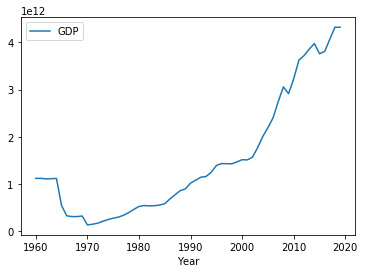

In [451]:
# Get overview about development of the gdp over time
gdp_plot = gdp_ro.groupby(['Year']).mean()
gdp_plot.plot()

- A clear increase in GDP can be observed over time, especially from 2000 until 2015

# Merge both datasets 
- merged dataset with weather data and agricultural land data
- GDP data

The datasets mentioned above are merged using the key parameters 'Country' and 'Year'

In [452]:
# merge the two datasets, inner join by default
df_weath_agr_gdp = pd.merge(weath_agr, gdp_ro, on=['Country', 'Year'])

In [453]:
df_weath_agr_gdp.head()

,Temperature(Celsius),Year,Statistics,Country,Agricultural land in %,GDP
0,11.3273,1961,Jan Average,Algeria,19.091505,2.434777e+09
1,14.8065,1961,Feb Average,Algeria,19.091505,2.434777e+09
2,17.6368,1961,Mar Average,Algeria,19.091505,2.434777e+09
3,23.0749,1961,Apr Average,Algeria,19.091505,2.434777e+09
4,28.1311,1961,May Average,Algeria,19.091505,2.434777e+09


In [454]:
countries_total = set(df_weath_agr_gdp['Country'].unique().tolist())
countries_total

{'Algeria',
 'Andorra',
 'Argentina',
 'Australia',
 'Austria',
 'Bangladesh',
 'Belgium',
 'Belize',
 'Benin',
 'Botswana',
 'Brazil',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 "Cote d'Ivoire",
 'Cuba',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Equatorial Guinea',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Iceland',
 'India',
 'Indonesia',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kenya',
 'Kiribati',
 'Kuwait',
 'Lesotho',
 'Liechtenstein',
 'Luxembourg',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Mali',
 'Malta',
 'Mauritania',
 'Mexico',
 'Morocco',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Niger',
 'Nigeria',
 'Norway',
 'Oman',
 'Pakistan',
 'Panama',
 'Papua New Guinea',
 'Paraguay',
 'Peru',
 'Philippines',
 'Portugal',
 'Qatar',
 'Rwanda',
 'Sau

In [455]:
len(countries_total)

83

In [456]:
# Reset index
df_weath_agr_gdp.reset_index(drop=True)

,Temperature(Celsius),Year,Statistics,Country,Agricultural land in %,GDP
0,11.32730,1961,Jan Average,Algeria,19.091505,2.434777e+09
1,14.80650,1961,Feb Average,Algeria,19.091505,2.434777e+09
2,17.63680,1961,Mar Average,Algeria,19.091505,2.434777e+09
3,23.07490,1961,Apr Average,Algeria,19.091505,2.434777e+09
4,28.13110,1961,May Average,Algeria,19.091505,2.434777e+09
...,...,...,...,...,...,...
53287,14.87570,2015,Aug Average,United Kingdom,70.838672,2.928591e+12
53288,11.92190,2015,Sep Average,United Kingdom,70.838672,2.928591e+12
53289,9.93445,2015,Oct Average,United Kingdom,70.838672,2.928591e+12
53290,8.04995,2015,Nov Average,United Kingdom,70.838672,2.928591e+12


# Rainfall data

## Get overview of dataset and prepare it for merging: rainfall data

In [457]:
# Look at first dataset
rain1.head()

,0,1,2,3,4,5
0,Rainfall - (MM),Year,Statistics,Country,ISO3,NaN
1,45.6999,1961,Jan Average,Afghanistan,AFG,NaN
2,36.3156,1961,Feb Average,Afghanistan,AFG,NaN
3,67.186,1961,Mar Average,Afghanistan,AFG,NaN
4,83.5753,1961,Apr Average,Afghanistan,AFG,NaN


In [458]:
# Define header for first dataset
headers = rain1.iloc[0]
rain1 = pd.DataFrame(rain1.values[1:], columns=headers)
rain1.head()

,Rainfall - (MM),Year,Statistics,Country,ISO3,NaN
0,45.6999,1961,Jan Average,Afghanistan,AFG,NaN
1,36.3156,1961,Feb Average,Afghanistan,AFG,NaN
2,67.186,1961,Mar Average,Afghanistan,AFG,NaN
3,83.5753,1961,Apr Average,Afghanistan,AFG,NaN
4,20.042,1961,May Average,Afghanistan,AFG,NaN


In [459]:
# Rename columns
rain1.rename(columns={"Rainfall - (MM)": "Rainfall(MM)", " Country" : "Country", " Statistics" : "Statistics", " Year" : "Year"}, inplace=True)
rain1.head()

,Rainfall(MM),Year,Statistics,Country,ISO3,NaN
0,45.6999,1961,Jan Average,Afghanistan,AFG,NaN
1,36.3156,1961,Feb Average,Afghanistan,AFG,NaN
2,67.186,1961,Mar Average,Afghanistan,AFG,NaN
3,83.5753,1961,Apr Average,Afghanistan,AFG,NaN
4,20.042,1961,May Average,Afghanistan,AFG,NaN


In [460]:
# Check columns
rain1.columns.values.tolist()

['Rainfall(MM)', 'Year', 'Statistics', 'Country', ' ISO3', nan]

In [461]:
# Get rid of blanks in strings in column 'Year' and 'Rainfall(MM)' and 'Country'
rain1['Year'] = rain1['Year'].str.strip()
rain1['Rainfall(MM)'] = rain1['Rainfall(MM)'].str.strip()
rain1['Country'] = rain1['Country'].str.strip()

# Check if it worked for column 'Country'
print(rain1['Country'].unique().tolist())

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Democratic Republic of the)', 'Congo (Republic of the)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Faroe Islands', 'Federated States of Micronesia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',

In [462]:
# Delete column ISO3, because we don't need it
rain1.drop([' ISO3'], axis=1, inplace=True)

In [463]:
# Delete NaN, majority is Null values
rain1.drop([np.nan], axis=1, inplace=True)

In [464]:
# Check if it worked
rain1.head()

,Rainfall(MM),Year,Statistics,Country
0,45.6999,1961,Jan Average,Afghanistan
1,36.3156,1961,Feb Average,Afghanistan
2,67.186,1961,Mar Average,Afghanistan
3,83.5753,1961,Apr Average,Afghanistan
4,20.042,1961,May Average,Afghanistan


In [465]:
# Change datatypes
rain1['Year'] = rain1['Year'].astype('int')
rain1['Rainfall(MM)'] = rain1['Rainfall(MM)'].astype('float')
rain1['Country'] = rain1['Country'].astype('category')

# Show changes
rain1.dtypes

0
Rainfall(MM)     float64
Year               int64
Statistics        object
Country         category
dtype: object

In [466]:
# Look at second dataset
rain2.head()

,0,1,2,3,4,5
0,Rainfall - (MM),Year,Statistics,Country,ISO3,NaN
1,64.7765,1991,Jan Average,Afghanistan,AFG,NaN
2,59.4025,1991,Feb Average,Afghanistan,AFG,NaN
3,119.625,1991,Mar Average,Afghanistan,AFG,NaN
4,51.8025,1991,Apr Average,Afghanistan,AFG,NaN


In [467]:
# Define header for second dataset
headers = rain2.iloc[0]
rain2 = pd.DataFrame(rain2.values[1:], columns=headers)
rain2.head()

,Rainfall - (MM),Year,Statistics,Country,ISO3,NaN
0,64.7765,1991,Jan Average,Afghanistan,AFG,NaN
1,59.4025,1991,Feb Average,Afghanistan,AFG,NaN
2,119.625,1991,Mar Average,Afghanistan,AFG,NaN
3,51.8025,1991,Apr Average,Afghanistan,AFG,NaN
4,57.2438,1991,May Average,Afghanistan,AFG,NaN


In [468]:
# Rename columns
rain2.rename(columns={"Rainfall - (MM)": "Rainfall(MM)", " Country" : "Country", " Statistics" : "Statistics", " Year" : "Year"}, inplace=True)
rain2.head()

,Rainfall(MM),Year,Statistics,Country,ISO3,NaN
0,64.7765,1991,Jan Average,Afghanistan,AFG,NaN
1,59.4025,1991,Feb Average,Afghanistan,AFG,NaN
2,119.625,1991,Mar Average,Afghanistan,AFG,NaN
3,51.8025,1991,Apr Average,Afghanistan,AFG,NaN
4,57.2438,1991,May Average,Afghanistan,AFG,NaN


In [469]:
# Check columns
rain2.columns.values.tolist()

['Rainfall(MM)', 'Year', 'Statistics', 'Country', ' ISO3', nan]

In [470]:
# Get rid of blanks in strings in column 'Year' and 'Rainfall(MM)' and 'Country'
rain2['Year'] = rain2['Year'].str.strip()
rain2['Rainfall(MM)'] = rain2['Rainfall(MM)'].str.strip()
rain2['Country'] = rain2['Country'].str.strip()

# Check if it worked for column 'Country'
print(rain2['Country'].unique().tolist())

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Democratic Republic of the)', 'Congo (Republic of the)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Faroe Islands', 'Federated States of Micronesia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',

In [471]:
# Delete column ISO3, because we don't need it for further analysis
rain2.drop([' ISO3'], axis=1, inplace=True)

In [472]:
# Delete NaN, majority is Null values
rain2.drop([np.nan], axis=1, inplace=True)

In [473]:
# Check if it worked
rain2.head()

,Rainfall(MM),Year,Statistics,Country
0,64.7765,1991,Jan Average,Afghanistan
1,59.4025,1991,Feb Average,Afghanistan
2,119.625,1991,Mar Average,Afghanistan
3,51.8025,1991,Apr Average,Afghanistan
4,57.2438,1991,May Average,Afghanistan


In [474]:
# Drop rows with entries of 2016 (we only observe a time frame 1961-2015)
indexNames = rain2[ rain2['Year']=='2016'].index
rain2.drop(indexNames, inplace=True)
print(indexNames)

Int64Index([  300,   301,   302,   303,   304,   305,   306,   307,   308,
              309,
            ...
            61142, 61143, 61144, 61145, 61146, 61147, 61148, 61149, 61150,
            61151],
           dtype='int64', length=2352)


In [475]:
# Check if it worked
rain2.tail()

,Rainfall(MM),Year,Statistics,Country
61135,0.01121,2015,Aug Average,Zimbabwe
61136,8.89114,2015,Sep Average,Zimbabwe
61137,3.11293,2015,Oct Average,Zimbabwe
61138,44.9079,2015,Nov Average,Zimbabwe
61139,71.8511,2015,Dec Average,Zimbabwe


In [476]:
# Change datatypes
rain2['Year'] = rain2['Year'].astype('int')
rain2['Rainfall(MM)'] = rain2['Rainfall(MM)'].astype('float')
rain2['Country'] = rain2['Country'].astype('category')

# Show changes
rain2.dtypes

0
Rainfall(MM)     float64
Year               int64
Statistics        object
Country         category
dtype: object

In [477]:
# Concat rain1 and rain2
rain = pd.concat([rain1,rain2])
print(rain)

0      Rainfall(MM)  Year    Statistics      Country
0          45.69990  1961   Jan Average  Afghanistan
1          36.31560  1961   Feb Average  Afghanistan
2          67.18600  1961   Mar Average  Afghanistan
3          83.57530  1961   Apr Average  Afghanistan
4          20.04200  1961   May Average  Afghanistan
...             ...   ...           ...          ...
61135       0.01121  2015   Aug Average     Zimbabwe
61136       8.89114  2015   Sep Average     Zimbabwe
61137       3.11293  2015   Oct Average     Zimbabwe
61138      44.90790  2015   Nov Average     Zimbabwe
61139      71.85110  2015   Dec Average     Zimbabwe

[129360 rows x 4 columns]


In [478]:
# Reset index after concat
rain.reset_index(drop=True)

,Rainfall(MM),Year,Statistics,Country
0,45.69990,1961,Jan Average,Afghanistan
1,36.31560,1961,Feb Average,Afghanistan
2,67.18600,1961,Mar Average,Afghanistan
3,83.57530,1961,Apr Average,Afghanistan
4,20.04200,1961,May Average,Afghanistan
...,...,...,...,...
129355,0.01121,2015,Aug Average,Zimbabwe
129356,8.89114,2015,Sep Average,Zimbabwe
129357,3.11293,2015,Oct Average,Zimbabwe
129358,44.90790,2015,Nov Average,Zimbabwe


In [479]:
# Check datatypes
rain.dtypes

0
Rainfall(MM)     float64
Year               int64
Statistics        object
Country         category
dtype: object

In [480]:
# Get info about rain dataset
rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129360 entries, 0 to 61139
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Rainfall(MM)  129360 non-null  float64 
 1   Year          129360 non-null  int64   
 2   Statistics    129360 non-null  object  
 3   Country       129360 non-null  category
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [481]:
# Count null values
rain.isnull().sum()

0
Rainfall(MM)    0
Year            0
Statistics      0
Country         0
dtype: int64

In [482]:
# Drop columns that are not needed
rain.drop('Statistics', axis=1, inplace=True)

In [483]:
# Reset index
rain.reset_index(drop=True)

,Rainfall(MM),Year,Country
0,45.69990,1961,Afghanistan
1,36.31560,1961,Afghanistan
2,67.18600,1961,Afghanistan
3,83.57530,1961,Afghanistan
4,20.04200,1961,Afghanistan
...,...,...,...
129355,0.01121,2015,Zimbabwe
129356,8.89114,2015,Zimbabwe
129357,3.11293,2015,Zimbabwe
129358,44.90790,2015,Zimbabwe


In [484]:
# Look at datatypes of first dataset
df_weath_agr_gdp.dtypes

Temperature(Celsius)      float64
Year                        int64
Statistics                 object
Country                    object
Agricultural land in %    float64
GDP                       float64
dtype: object

In [485]:
# Change datatype of 'Country'
df_weath_agr_gdp['Country'] = df_weath_agr_gdp['Country'].astype('category')

# Show changes
df_weath_agr_gdp.dtypes

Temperature(Celsius)       float64
Year                         int64
Statistics                  object
Country                   category
Agricultural land in %     float64
GDP                        float64
dtype: object

In [486]:
# Look at datatypes of second dataset (rainfall)
rain.dtypes

0
Rainfall(MM)     float64
Year               int64
Country         category
dtype: object

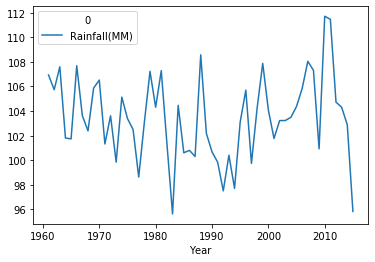

In [487]:
# Get overview about development of the data over the observed period
rain_plot = rain.groupby(['Year']).mean()
rain_plot.plot()

- Rainfall underlies strong seasonal variability such no clear trend can be stated

# Merge rainfall data with GDP and weather/agricultural land data

- The datasets mentioned above are merged using the key parameters 'Country' and 'Year'

In [488]:
# Merge rain data with weather_agric/gdp
df_total = pd.merge(df_weath_agr_gdp, rain, on=['Country','Year'])

In [489]:
# Check
df_total.head()

,Temperature(Celsius),Year,Statistics,Country,Agricultural land in %,GDP,Rainfall(MM)
0,11.3273,1961,Jan Average,Algeria,19.091505,2.434777e+09,17.62290
1,11.3273,1961,Jan Average,Algeria,19.091505,2.434777e+09,1.52570
2,11.3273,1961,Jan Average,Algeria,19.091505,2.434777e+09,3.98158
3,11.3273,1961,Jan Average,Algeria,19.091505,2.434777e+09,3.69641
4,11.3273,1961,Jan Average,Algeria,19.091505,2.434777e+09,1.25563


In [490]:
# Recalculate unit of GDP
df_total['GDP'] = df_total['GDP'].div(1000000000)

In [491]:
# Rename column GDP
df_total.rename(columns={"GDP": "GDP in billion $US"}, inplace=True)

In [492]:
# Reorder the Columns
df_total = df_total[["Country", "Year", "Statistics", "Temperature(Celsius)","Rainfall(MM)", "Agricultural land in %", "GDP in billion $US"]]

In [493]:
# Check if everything worked
df_total.head()

,Country,Year,Statistics,Temperature(Celsius),Rainfall(MM),Agricultural land in %,GDP in billion $US
0,Algeria,1961,Jan Average,11.3273,17.62290,19.091505,2.434777
1,Algeria,1961,Jan Average,11.3273,1.52570,19.091505,2.434777
2,Algeria,1961,Jan Average,11.3273,3.98158,19.091505,2.434777
3,Algeria,1961,Jan Average,11.3273,3.69641,19.091505,2.434777
4,Algeria,1961,Jan Average,11.3273,1.25563,19.091505,2.434777


In [494]:
# Check datatypes
df_total.dtypes

Country                    object
Year                        int64
Statistics                 object
Temperature(Celsius)      float64
Rainfall(MM)              float64
Agricultural land in %    float64
GDP in billion $US        float64
dtype: object

# Calculation of all variables on an annual basis
- only annual values are available for GDP and agricultural land
- the annual average is also calculated for temperature and rainfall on the basis of monthly values
- in addition, the minimum and maximum temperatures per year are determined for each country
- new columns are added to the total data set

In [495]:
# Calculate average annual temperature
temp_avg = df_total.groupby(['Country', 'Year'])['Temperature(Celsius)'].mean().reset_index().rename(columns={'Temperature(Celsius)':'Temperature(Avg.)'})

In [496]:
# Check if it worked
print(temp_avg)

             Country  Year  Temperature(Avg.)
0            Algeria  1961          22.821850
1            Algeria  1962          22.531092
2            Algeria  1963          22.573142
3            Algeria  1964          22.629875
4            Algeria  1965          22.416617
...              ...   ...                ...
4436  United Kingdom  2011           9.437954
4437  United Kingdom  2012           8.766578
4438  United Kingdom  2013           8.887475
4439  United Kingdom  2014           9.809685
4440  United Kingdom  2015           9.087434

[4441 rows x 3 columns]


In [497]:
# Calculate average annual rainfall
rain_avg = df_total.groupby(['Country', 'Year'])['Rainfall(MM)'].mean().reset_index().rename(columns={'Rainfall(MM)':'Rainfall(Avg.)'})

In [498]:
# Check if it worked
print(rain_avg)

             Country  Year  Rainfall(Avg.)
0            Algeria  1961        4.962476
1            Algeria  1962        7.942018
2            Algeria  1963        7.836509
3            Algeria  1964        6.863724
4            Algeria  1965        6.552506
...              ...   ...             ...
4436  United Kingdom  2011      100.165300
4437  United Kingdom  2012      118.742758
4438  United Kingdom  2013       98.119100
4439  United Kingdom  2014      116.344358
4440  United Kingdom  2015      110.174583

[4441 rows x 3 columns]


In [499]:
# Calculate minimum temperature per year for each country
temp_min = df_total.groupby(['Country', 'Year'])['Temperature(Celsius)'].min().reset_index().rename(columns={'Temperature(Celsius)':'Temperature(Min)'})

In [500]:
# # Calculate maximum temperature per year for each country
temp_max = df_total.groupby(['Country', 'Year'])['Temperature(Celsius)'].max().reset_index().rename(columns={'Temperature(Celsius)':'Temperature(Max)'})

In [501]:
# Check
print(temp_min)

             Country  Year  Temperature(Min)
0            Algeria  1961          11.32730
1            Algeria  1962          12.38910
2            Algeria  1963          13.52160
3            Algeria  1964          11.83190
4            Algeria  1965          12.14610
...              ...   ...               ...
4436  United Kingdom  2011           3.03013
4437  United Kingdom  2012           4.09456
4438  United Kingdom  2013           2.95438
4439  United Kingdom  2014           4.38727
4440  United Kingdom  2015           3.48429

[4441 rows x 3 columns]


In [502]:
# Check
print(temp_max)

             Country  Year  Temperature(Max)
0            Algeria  1961           32.8581
1            Algeria  1962           32.6300
2            Algeria  1963           32.6186
3            Algeria  1964           32.3364
4            Algeria  1965           32.7202
...              ...   ...               ...
4436  United Kingdom  2011           14.0481
4437  United Kingdom  2012           15.3931
4438  United Kingdom  2013           16.4975
4439  United Kingdom  2014           16.3148
4440  United Kingdom  2015           14.8757

[4441 rows x 3 columns]


In [503]:
# Add new columns to existing dataframe
df_total = df_total.merge(temp_avg, on=['Country', 'Year'], how='inner').merge(rain_avg, on=['Country', 'Year'], how='inner').merge(temp_min, on=['Country', 'Year'], how='inner').merge(temp_max, on=['Country', 'Year'], how='inner')

In [504]:
# Check correctness for the first two years
df_total.head(24)

,Country,Year,Statistics,Temperature(Celsius),Rainfall(MM),Agricultural land in %,GDP in billion $US,Temperature(Avg.),Rainfall(Avg.),Temperature(Min),Temperature(Max)
0,Algeria,1961,Jan Average,11.3273,17.62290,19.091505,2.434777,22.82185,4.962476,11.3273,32.8581
1,Algeria,1961,Jan Average,11.3273,1.52570,19.091505,2.434777,22.82185,4.962476,11.3273,32.8581
2,Algeria,1961,Jan Average,11.3273,3.98158,19.091505,2.434777,22.82185,4.962476,11.3273,32.8581
3,Algeria,1961,Jan Average,11.3273,3.69641,19.091505,2.434777,22.82185,4.962476,11.3273,32.8581
4,Algeria,1961,Jan Average,11.3273,1.25563,19.091505,2.434777,22.82185,4.962476,11.3273,32.8581
5,Algeria,1961,Jan Average,11.3273,5.61612,19.091505,2.434777,22.82185,4.962476,11.3273,32.8581
6,Algeria,1961,Jan Average,11.3273,2.60456,19.091505,2.434777,22.82185,4.962476,11.3273,32.8581
7,Algeria,1961,Jan Average,11.3273,3.69136,19.091505,2.434777,22.82185,4.962476,11.3273,32.8581
8,Algeria,1961,Jan Average,11.3273,1.76060,19.091505,2.434777,22.82185,4.962476,11.3273,32.8581
9,Algeria,1961,Jan Average,11.3273,6.68129,19.091505,2.434777,22.82185,4.962476,11.3273,32.8581


In [505]:
# Check correctness for the last two years
df_total.tail(24)

,Country,Year,Statistics,Temperature(Celsius),Rainfall(MM),Agricultural land in %,GDP in billion $US,Temperature(Avg.),Rainfall(Avg.),Temperature(Min),Temperature(Max)
639480,United Kingdom,2015,Nov Average,8.04995,140.5190,70.838672,2928.591002,9.087434,110.174583,3.48429,14.8757
639481,United Kingdom,2015,Nov Average,8.04995,74.6518,70.838672,2928.591002,9.087434,110.174583,3.48429,14.8757
639482,United Kingdom,2015,Nov Average,8.04995,89.9526,70.838672,2928.591002,9.087434,110.174583,3.48429,14.8757
639483,United Kingdom,2015,Nov Average,8.04995,47.1568,70.838672,2928.591002,9.087434,110.174583,3.48429,14.8757
639484,United Kingdom,2015,Nov Average,8.04995,114.1350,70.838672,2928.591002,9.087434,110.174583,3.48429,14.8757
639485,United Kingdom,2015,Nov Average,8.04995,56.7888,70.838672,2928.591002,9.087434,110.174583,3.48429,14.8757
639486,United Kingdom,2015,Nov Average,8.04995,115.7340,70.838672,2928.591002,9.087434,110.174583,3.48429,14.8757
639487,United Kingdom,2015,Nov Average,8.04995,114.4410,70.838672,2928.591002,9.087434,110.174583,3.48429,14.8757
639488,United Kingdom,2015,Nov Average,8.04995,72.6955,70.838672,2928.591002,9.087434,110.174583,3.48429,14.8757
639489,United Kingdom,2015,Nov Average,8.04995,91.1255,70.838672,2928.591002,9.087434,110.174583,3.48429,14.8757


# Some statistics for more information about the data
- outlier
- development over time / time series comparison
- relationships between data
- statistics especially for Germany

### Outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x7f882859e590>,
 'caps': [<matplotlib.lines.Line2D at 0x7f882859efd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f88285958d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f88285a4a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f88285a4f50>],
 'means': []}

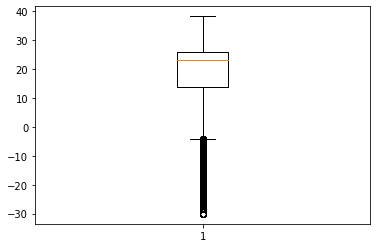

In [506]:
# Check outliers in the temperature data
plt.boxplot(df_total['Temperature(Celsius)'])

- a lot of outliers in the lower range of the temperature scala

{'whiskers': [<matplotlib.lines.Line2D at 0x7f882b563ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f882b569550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f882b555e10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f882b569f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f882863a4d0>],
 'means': []}

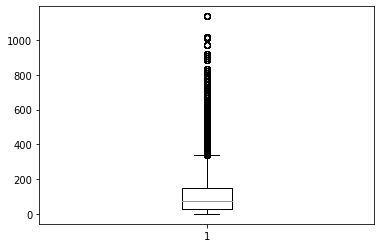

In [507]:
# Check outliers in the rainfall data
plt.boxplot(df_total['Rainfall(MM)'])

- as expected the rainfall data has  alot of outliers, because the data has a high variance

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8828767590>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8828767fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f882875e8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8828771a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8828771f50>],
 'means': []}

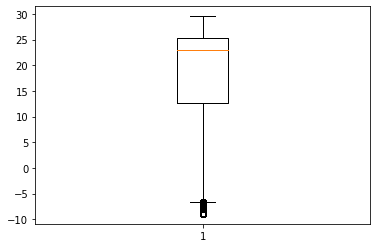

In [508]:
# Check outliers in the avg. temperature data
plt.boxplot(df_total['Temperature(Avg.)'])

- On average, there are only a few outliers for temperatures below 0°C

{'whiskers': [<matplotlib.lines.Line2D at 0x7f88289f1f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f88289f9990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f88289f1290>],
 'medians': [<matplotlib.lines.Line2D at 0x7f88289e62d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8828a01910>],
 'means': []}

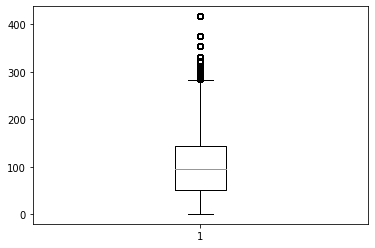

In [509]:
# Check outliers in the avg. rainfall data
plt.boxplot(df_total['Rainfall(Avg.)'])

- The average of rainfall has still quite a lot of outliers

### Time series comparisons

Text(0, 0.5, 'temp')

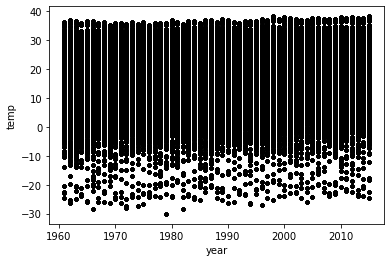

In [510]:
# Create scatter point diagram for Temperature
plt.plot(df_total['Year'], df_total['Temperature(Celsius)'],  'k.')
plt.xlabel('year')
plt.ylabel('temp')

- The plot shows that the average temperature does not exceed 40°C. The most frequent values are betweel 0 and 30°C

[1960, 2016, 35, 40]

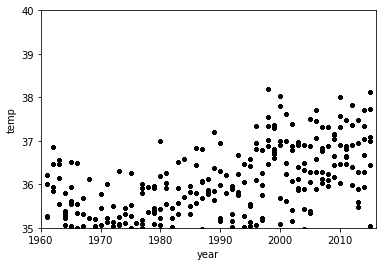

In [511]:
# Check change in maximum temperatures
plt.plot(df_total['Year'], df_total['Temperature(Celsius)'],  'k.')
plt.xlabel('year')
plt.ylabel('temp')
# Attention: only upper half displayed via axis restriction
plt.axis([1960, 2016, 35, 40])

- It can be observed, that higher temperatures are more frequent over time, also the maximum temperature rises to over 38°C

Text(0, 0.5, 'rain')

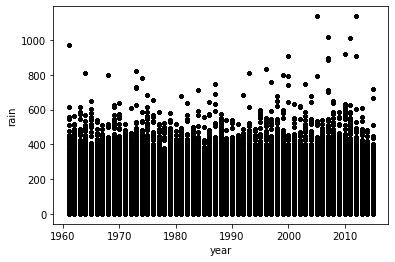

In [512]:
# Create scatter point diagram (rainfall)
plt.plot(df_total['Year'], df_total['Rainfall(MM)'],  'k.')
plt.xlabel('year')
plt.ylabel('rain')

- The plot shows that the amount of rain varies a lot, but the majority does not exceed 500mm.

Text(0, 0.5, 'land%')

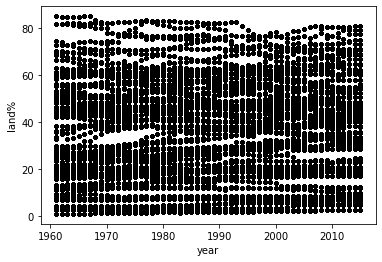

In [513]:
# Create scatter point diagram (agricultural land)
plt.plot(df_total['Year'], df_total['Agricultural land in %'],  'k.')
plt.xlabel('year')
plt.ylabel('land%')

- No explicit statement possible, while the percentage of agricultural land rises for some countries it decreases for others over time
- Further analysis needed

Text(0, 0.5, 'gdp')

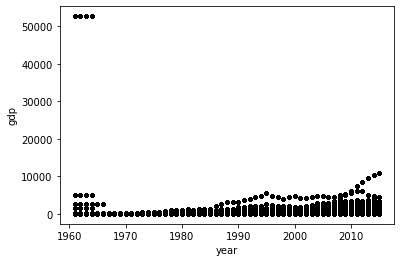

In [514]:
# Create scatter point diagram (GDP)
plt.plot(df_total['Year'], df_total['GDP in billion $US'],  'k.')
plt.xlabel('year')
plt.ylabel('gdp')

- No explicit statement possible based on this plot
- further analysis neccessary

Text(0, 0.5, 'temp (avg.)')

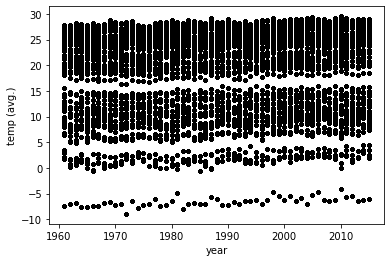

In [515]:
# Create scatter point diagram (average Temperature)
plt.plot(df_total['Year'], df_total['Temperature(Avg.)'],  'k.')
plt.xlabel('year')
plt.ylabel('temp (avg.)')

- The average temperature is between -5 and -10°C at its lowest, between 25 and 30°C at its highest
- The density of datapoints is highest between 20 and 30°C

Text(0, 0.5, 'rain (avg.)')

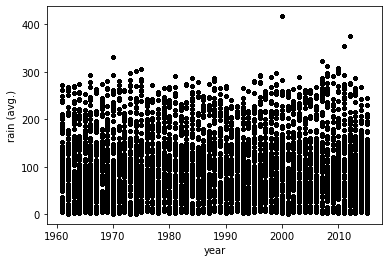

In [516]:
# Create scatter point diagram (average rainfall)
plt.plot(df_total['Year'], df_total['Rainfall(Avg.)'],  'k.')
plt.xlabel('year')
plt.ylabel('rain (avg.)')

- There are some outliers, but it can be stated that the average by will be at about 100mm

Text(0, 0.5, 'temp (min)')

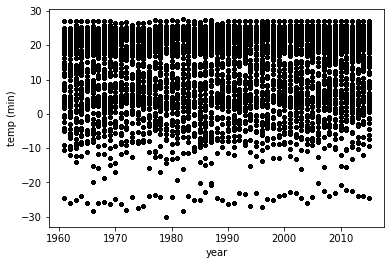

In [517]:
# Create scatter point diagram (minimum temperature)
plt.plot(df_total['Year'], df_total['Temperature(Min)'],  'k.')
plt.xlabel('year')
plt.ylabel('temp (min)')

- a further look into the minimum temperature shows, that there are countries that experience tempreatures around -30°C, but it is rather rare

[1960, 2016, -35, -15]

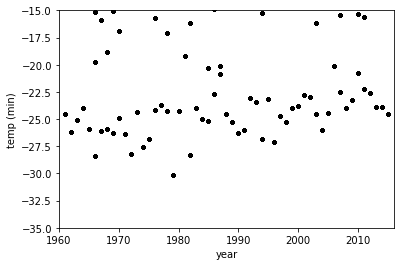

In [518]:
# Check lower change of the minimum temperature
plt.plot(df_total['Year'], df_total['Temperature(Min)'],  'k.')
plt.xlabel('year')
plt.ylabel('temp (min)')
plt.axis([1960, 2016, -35, -15])

- No definite statement possible, maybe a slight upward trend over the years

In [ ]:
# Create scatter point diagram (maximum temperature)
plt.plot(df_total['Year'], df_total['Temperature(Max)'],  'k.')
plt.xlabel('year')
plt.ylabel('temp (max)')

Text(0, 0.5, 'temp (max)')

- No definite statement possible, maybe a slight upward trend over the years

In [ ]:
# Check change of the maximum temperature
plt.plot(df_total['Year'], df_total['Temperature(Max)'],  'k.')
plt.xlabel('year')
plt.ylabel('temp (max)')
plt.axis([1960, 2016, 30, 40])

- a clear upward trend of the maximum temperature can be observed

### Statistics especially for Germany

In [ ]:
# Create subset
subset_germany = df_total[df_total['Country'] == 'Germany']

In [ ]:
# Check
subset_germany.head()

In [ ]:
# Create scatter point diagram maximum temperature (Germany)
plt.plot(subset_germany['Year'], subset_germany['Temperature(Max)'],  'k.')
plt.xlabel('year')
plt.ylabel('temp (max) germany')

- For Germany a clear increase in maximum temperature can be stated over time

In [ ]:
# Create scatter point diagram average temperature (Germany)
plt.plot(subset_germany['Year'], subset_germany['Temperature(Avg.)'],  'k.')
plt.xlabel('year')
plt.ylabel('temp (avg) germany')

- The average temperature is also significantly rising in Germany

In [ ]:
# Create scatter point diagram average rainfall (Germany)
plt.plot(subset_germany['Year'], subset_germany['Rainfall(Avg.)'],  'k.')
plt.xlabel('year')
plt.ylabel('rain (avg) germany')

- No clear trend can be observed, thus it can be stated that rain underlies saisonal variabilty in Germany

In [ ]:
# Create scatter point diagram acrigultural land (Germany)
plt.plot(subset_germany['Year'], subset_germany['Agricultural land in %'],  'k.')
plt.xlabel('year')
plt.ylabel('land% germany')

- The amount of agricultural land drastically decreased in Germany over time

In [ ]:
# Create scatter point diagram GDP (Germany)
plt.plot(subset_germany['Year'], subset_germany['GDP in billion $US'],  'k.')
plt.xlabel('year')
plt.ylabel('gpd germany')

- The GDP as quite constantly rising over time in Germany

In [ ]:
# Comparison of average temperature and agricultural land (Germany)
plt.plot(subset_germany['Temperature(Avg.)'], subset_germany['Agricultural land in %'],  'k.')
plt.xlabel('temp germany')
plt.ylabel('land% germany')

- The plot shows quite a trend to less agricultural land with increasing temperature

In [ ]:
# Comparison of average temperature and rainfall (Germany)
plt.plot(subset_germany['Temperature(Avg.)'], subset_germany['Rainfall(Avg.)'],  'k.')
plt.xlabel('temp germany')
plt.ylabel('rain germany')

- No statement regarding a correlation of average temeprature and the amount of rain can be made

# Final preparation of the dataset 
- for application of the analytical methods
- reduction of the dataset so that only annual data are included

In [ ]:
# Creating new data set, which should only contain values for the average per year
df_avg_year = df_total.copy()

In [ ]:
# After calculating the averages, the columns on a monthly basis are no longer needed and are therefore removed
df_avg_year.drop(['Statistics', 'Temperature(Celsius)', 'Rainfall(MM)'], axis=1, inplace=True)

In [ ]:
# Check if it worked
df_avg_year.head()

In [ ]:
# Remove duplicate rows so that there is only one row per country per year
df_avg_year.drop_duplicates(inplace=True)

In [ ]:
# Reset index
df_avg_year.reset_index(drop=True)

In [ ]:
# Check for null values
null_counts = df_avg_year.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

In [ ]:
# Creation of a CSV file of the complete data set to load it into a new notebook for further work
df_avg_year.to_csv('data_average_per_year.csv', index=False)